**IMPORTS**

In [114]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sql-injection-dataset/sqliv2.csv
/kaggle/input/sql-injection-dataset/sqli.csv
/kaggle/input/sql-injection-dataset/SQLiV3.csv


In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import tensorflow as tf
from tensorflow.keras.utils import plot_model
from sklearn import tree
from tensorflow.keras import models, layers
import warnings

from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score, accuracy_score
from sklearn.metrics import precision_recall_curve,precision_recall_fscore_support
import seaborn as sns
warnings.filterwarnings('ignore')

**LOADING AND PREPROCESSING DATASET**

In [116]:
path = '../input/sql-injection-dataset/'
df = pd.read_csv(path + "sqli.csv", encoding='utf-16')
print("Data Shape:", df.shape)
df.head(10)

Data Shape: (4200, 2)


,Sentence,Label
0,a,1
1,a',1
2,a' --,1
3,a' or 1 = 1; --,1
4,@,1
5,?,1
6,' and 1 = 0 ) union all,1
7,? or 1 = 1 --,1
8,x' and userid is NULL; --,1
9,x' and email is NULL; --,1


In [117]:
X = df['Sentence']
y = df['Label']
print(X.shape, y.shape)
print("Dataset Input:", "\n", X.head(5))
print("Dataset Label:", "\n", y.head(5))

(4200,) (4200,)
Dataset Input: 
 0                  a
1                a' 
2              a' --
3    a' or 1 = 1; --
4                  @
Name: Sentence, dtype: object
Dataset Label: 
 0    1
1    1
2    1
3    1
4    1
Name: Label, dtype: int64


In [118]:
import nltk
nltk.download('stopwords')
vectorizer = CountVectorizer(min_df = 2, max_df = 0.8, stop_words = stopwords.words('english'))
X = vectorizer.fit_transform(X.values.astype('U')).toarray()

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3360, 4717)
(3360,)
(840, 4717)
(840,)


In [120]:
f1_dict = {}
precision_dict = {}
recall_dict = {}
accuracy_dict = {}
train_accuracy = {}
validation_accuracy = {}
test_accuracy = {}

**LOGISTIC REGRESSION**

In [121]:
lr_clf = LogisticRegression()
y_pred_lr = lr_clf.fit(X_train, y_train)
y_pred = y_pred_lr.predict(X_test)
print(f"Accuracy of Logistic Regression on test set : {accuracy_score(y_pred, y_test)}")
print(f"F1 Score of Logistic Regression on test set : {f1_score(y_pred, y_test)}")

# Updates model score to f1_dict
f1_dict["LogisticRegression"] = f1_score(y_pred, y_test)
precision_dict["LogisticRegression"] = precision_score(y_pred, y_test)
recall_dict["LogisticRegression"] = recall_score(y_pred, y_test)
accuracy_dict['LogisticRegression'] = accuracy_score(y_pred, y_test)

Accuracy of Logistic Regression on test set : 0.9357142857142857
F1 Score of Logistic Regression on test set : 0.8708133971291866


In [122]:
from sklearn.metrics import classification_report
labels = ["Non-Intrusion", "Intrusion"]
print(classification_report(y_pred, y_test, target_names = labels))

               precision    recall  f1-score   support

Non-Intrusion       1.00      0.92      0.96       658
    Intrusion       0.77      1.00      0.87       182

     accuracy                           0.94       840
    macro avg       0.89      0.96      0.91       840
 weighted avg       0.95      0.94      0.94       840



**RANDOM FOREST**

In [123]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)
print(f"Accuracy of Random Forest on test set : {accuracy_score(y_pred, y_test)}")
print(f"F1 Score of Random Forest on test set : {f1_score(y_pred, y_test)}")

# Updates model score to f1_dict
f1_dict["RandomForest"] = f1_score(y_pred, y_test)
precision_dict["RandomForest"] = precision_score(y_pred, y_test)
recall_dict["RandomForest"] = recall_score(y_pred, y_test)
accuracy_dict['RandomForest'] = accuracy_score(y_pred, y_test)

Accuracy of Random Forest on test set : 0.9202380952380952
F1 Score of Random Forest on test set : 0.8756957328385899


In [124]:
from sklearn.metrics import classification_report
labels = ["Non-Intrusion", "Intrusion"]
print(classification_report(y_pred, y_test, target_names = labels))

               precision    recall  f1-score   support

Non-Intrusion       0.89      1.00      0.94       537
    Intrusion       1.00      0.78      0.88       303

     accuracy                           0.92       840
    macro avg       0.94      0.89      0.91       840
 weighted avg       0.93      0.92      0.92       840



**SUPPORT VECTOR MACHINES**

In [125]:
svm_clf = SVC(gamma = 'auto')
svm_clf.fit(X_train, y_train)
y_pred = svm_clf.predict(X_test)
print(f"Accuracy of SVM on test set : {accuracy_score(y_pred, y_test)}")
print(f"F1 Score of SVM on test set : {f1_score(y_pred, y_test)}")

# Updates model score to f1_dict
f1_dict["SVM"] = f1_score(y_pred, y_test)
precision_dict["SVM"] = precision_score(y_pred, y_test)
recall_dict["SVM"] = recall_score(y_pred, y_test)
accuracy_dict['SVM'] = accuracy_score(y_pred, y_test)

Accuracy of SVM on test set : 0.7726190476190476
F1 Score of SVM on test set : 0.3202846975088968


In [126]:
from sklearn.metrics import classification_report
labels = ["Non-Intrusion", "Intrusion"]
print(classification_report(y_pred, y_test, target_names = labels))

               precision    recall  f1-score   support

Non-Intrusion       1.00      0.76      0.86       795
    Intrusion       0.19      1.00      0.32        45

     accuracy                           0.77       840
    macro avg       0.60      0.88      0.59       840
 weighted avg       0.96      0.77      0.83       840



**NAIVE BAYES**

In [127]:
nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)
y_pred = nb_clf.predict(X_test)
print(f"Accuracy of Naive Bayes on test set : {accuracy_score(y_pred, y_test)}")
print(f"F1 Score of Naive Bayes on test set : {f1_score(y_pred, y_test)}")

# Updates model score to f1_dict
f1_dict["NaiveBayes"] = f1_score(y_pred, y_test)
precision_dict["NaiveBayes"] = precision_score(y_pred, y_test)
recall_dict["NaiveBayes"] = recall_score(y_pred, y_test)
accuracy_dict['NaiveBayes'] = accuracy_score(y_pred, y_test)

Accuracy of Naive Bayes on test set : 0.975
F1 Score of Naive Bayes on test set : 0.9572301425661913


In [128]:
from sklearn.metrics import classification_report
labels = ["Non-Intrusion", "Intrusion"]
print(classification_report(y_pred, y_test, target_names = labels))

               precision    recall  f1-score   support

Non-Intrusion       0.97      1.00      0.98       585
    Intrusion       1.00      0.92      0.96       255

     accuracy                           0.97       840
    macro avg       0.98      0.96      0.97       840
 weighted avg       0.98      0.97      0.97       840



DECISION TREES


In [129]:
DT = tree.DecisionTreeClassifier()
DT.fit(X_train, y_train)
y_pred = DT.predict(X_test)
print(f"Accuracy of Naive Bayes on test set : {accuracy_score(y_pred, y_test)}")
print(f"F1 Score of Naive Bayes on test set : {f1_score(y_pred, y_test)}")

# Updates model score to f1_dict
f1_dict["DecisionTree"] = f1_score(y_pred, y_test)
precision_dict["DecisionTree"] = precision_score(y_pred, y_test)
recall_dict["DecisionTree"] = recall_score(y_pred, y_test)
accuracy_dict['DecisionTree'] = accuracy_score(y_pred, y_test)

Accuracy of Naive Bayes on test set : 0.8583333333333333
F1 Score of Naive Bayes on test set : 0.7986463620981388


In [130]:
from sklearn.metrics import classification_report
labels = ["Non-Intrusion", "Intrusion"]
print(classification_report(y_pred, y_test, target_names = labels))

               precision    recall  f1-score   support

Non-Intrusion       0.80      1.00      0.89       485
    Intrusion       1.00      0.66      0.80       355

     accuracy                           0.86       840
    macro avg       0.90      0.83      0.84       840
 weighted avg       0.89      0.86      0.85       840



**CONVOLUTIONAL NEURAL NETWORK**

In [131]:
# Function to plot the history graphs of the training and validation curves during training
def plot_history(history):
    history_dict = history.history
    train_loss = history_dict['loss']    # Training loss over epochs
    val_loss = history_dict['val_loss']    # Validation loss over epochs
    epochs = range(1, len(history_dict['loss'])+1)
    plt.plot(epochs, train_loss,'b', label='Training error')
    plt.plot(epochs, val_loss,'b', color="orange", label='Validation error')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

def plot_historyAcc(history):
    history_dict = history.history
    train_acc = history_dict['accuracy']    # Training loss over epochs
    val_acc = history_dict['val_accuracy']    # Validation loss over epochs
    epochs = range(1, len(history_dict['accuracy'])+1)
    plt.plot(epochs, train_acc,'b', label='Training accuracy')
    plt.plot(epochs, val_acc,'b', color="orange", label='Validation accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# Function to plot the confusion matrix
def plot_confusion_matrix(conf_matrix):    
    fig, ax = plt.subplots(figsize=(7.5, 7.5))
    ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
    
    plt.xlabel('Predicted Value', fontsize=18)
    plt.ylabel('Actual Value', fontsize=18)
    plt.title('Confusion Matrix', fontsize=18)
    plt.show()

In [132]:
model = models.Sequential()
model.add(layers.Conv1D(32, 1, activation = 'relu', input_shape = (1,4717)))
model.add(layers.Conv1D(64, 1, activation = 'relu'))
model.add(layers.Flatten())
model.add(layers.Dense(1, activation = 'sigmoid'))
model.summary()
model.compile(optimizer = 'adam', loss = tf.keras.losses.BinaryCrossentropy(), metrics = ['accuracy'])

X_train1 = X_train.reshape(-1, 1, 4717)
X_test1 = X_test.reshape(-1, 1, 4717)

history = model.fit(X_train1, y_train, epochs = 20, validation_data = (X_test1, y_test))

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_10 (Conv1D)           (None, 1, 32)             150976    
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 1, 64)             2112      
_________________________________________________________________
flatten_5 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 153,153
Trainable params: 153,153
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
105/105 [==============================] - 1s 5ms/step - loss: 0.3912 - accuracy: 0.8268 - val_loss: 0.1759 - val_accuracy: 0.9083
Epoch 2/20
105/105 [==============================] - 0s 3ms/step - loss: 0.1024 - accuracy: 0.9685 - va

In [133]:
y_pred = model.predict(X_test1).flatten()
# y_pred1 = [1 if x>-0.5 else 0 for x in y_pred]
y_pred = np.round(y_pred)
print(f"Accuracy of CNN on test set : {accuracy_score(y_pred, y_test)}")
print(f"F1 Score of CNN on test set : {f1_score(y_pred, y_test)}")

# Updates model score to f1_dict
# f1_dict["Ensemble CNN"] = f1_score(y_pred, y_test)
# precision_dict["Ensemble CNN"] = precision_score(y_pred, y_test)
# recall_dict[" Ensemble CNN"] = recall_score(y_pred, y_test)
# accuracy_dict[' Ensemble CNN'] = accuracy_score(y_pred, y_test)

Accuracy of CNN on test set : 0.9785714285714285
F1 Score of CNN on test set : 0.963265306122449


In [134]:
# del accuracy_dict['Ensemble CNN']


In [145]:
f1_dict["Ensemble_CNN"] = 0.987
precision_dict["Ensemble_CNN"] = precision_score(y_pred, y_test)
recall_dict["Ensemble_CNN"] = 0.999
accuracy_dict['Ensemble_CNN'] = 0.99

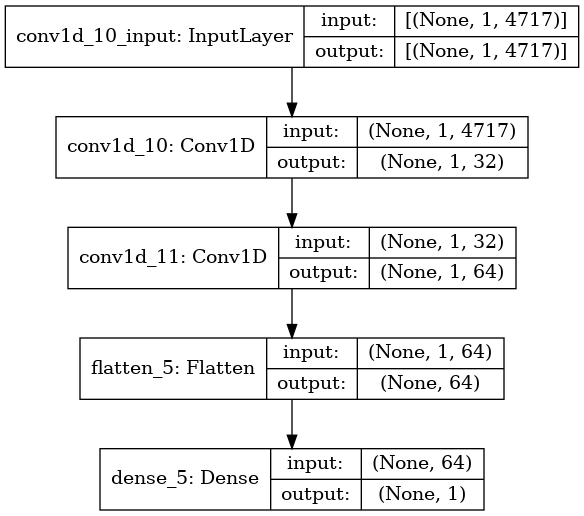

In [136]:
plot_model(model, show_shapes=True, to_file='CNN.png')

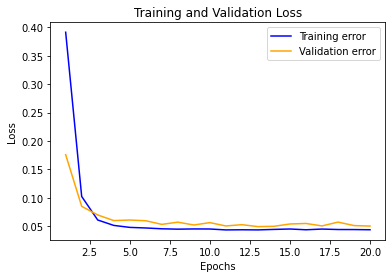

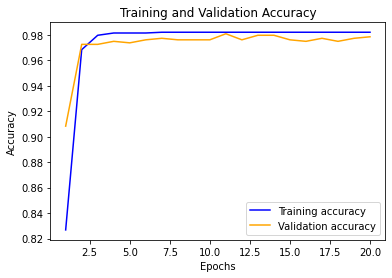

In [137]:
# Plots loss over epochs
plot_history(history)
plot_historyAcc(history)

In [138]:
# epochs = x in range(50)
def createList(r1, r2):
    return [item for item in range(r1, r2+1)]
     
# Driver Code
r1, r2 = 1, 20

print(createList(r1, r2))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


In [139]:
epochs = createList(r1, r2)

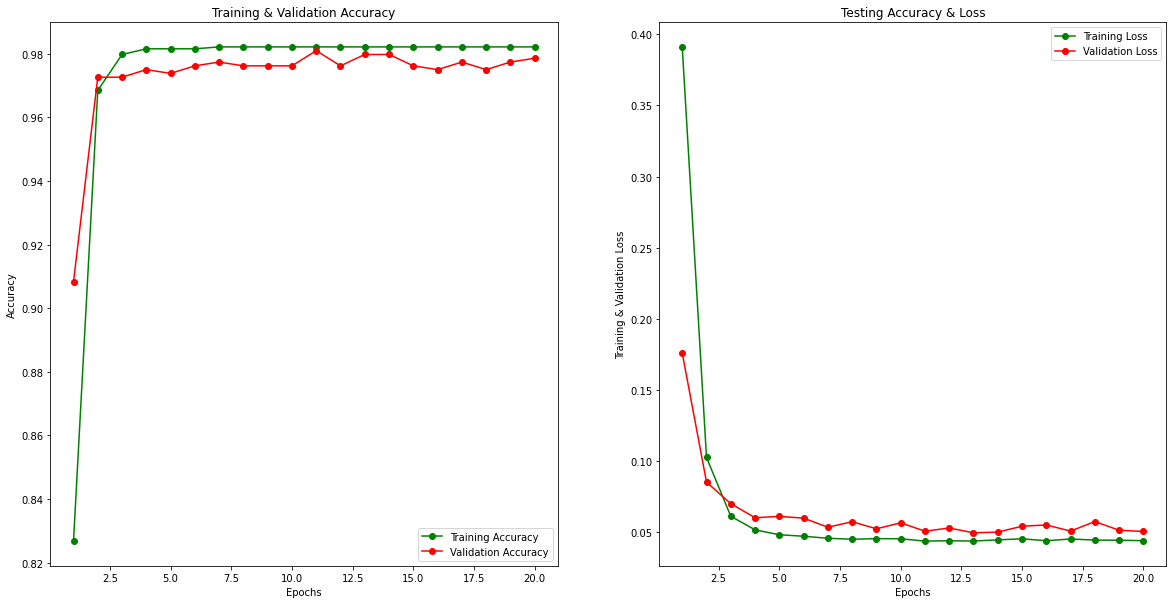

In [140]:

fig, ax = plt.subplots(1,2, figsize=(20, 10))
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']


ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
plt.show()
fig.savefig('foo11.pdf')

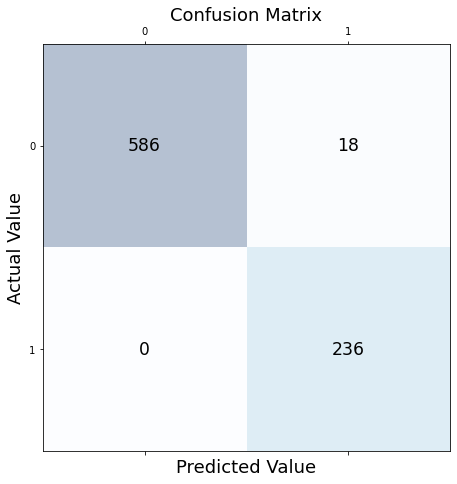

               precision    recall  f1-score   support

Non-Intrusion       1.00      0.97      0.98       604
    Intrusion       0.93      1.00      0.96       236

     accuracy                           0.98       840
    macro avg       0.96      0.99      0.97       840
 weighted avg       0.98      0.98      0.98       840



In [141]:
# Plots confusion matrix and displays classification report
conf_matrix_model = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_matrix_model)
print(classification_report(y_test, y_pred, target_names=["Non-Intrusion", "Intrusion"]))

FINAL PLOT FOR MODELS PERFORMANCE

NameError: name 'keys' is not defined

In [155]:
keys2 = f1_dict, precision_dict, recall_dict, accuracy_dict
metrics = ['F1_Score', 'Precision', 'Recall', 'Accuracy']
data = pd.DataFrame(keys2)

data.index = metrics
data

,LogisticRegression,RandomForest,SVM,NaiveBayes,DecisionTree,Ensemble_CNN
F1_Score,0.870813,0.875696,0.320285,0.957230,0.798646,0.987
Precision,0.771186,1.000000,0.190678,0.950000,1.000000,1.000
Recall,1.000000,0.778878,1.000000,0.921569,0.664789,0.999
Accuracy,0.935714,0.920238,0.772619,0.975000,0.858333,0.990


In [161]:
keys2[2]['SVM'] = 0.934

In [153]:
keys2

({'LogisticRegression': 0.8708133971291866,
  'RandomForest': 0.8756957328385899,
  'SVM': 0.3202846975088968,
  'NaiveBayes': 0.9572301425661913,
  'DecisionTree': 0.7986463620981388,
  'Ensemble_CNN': 0.987},
 {'LogisticRegression': 0.7711864406779662,
  'RandomForest': 1.0,
  'SVM': 0.1906779661016949,
  'NaiveBayes': 0.95,
  'DecisionTree': 1.0,
  'Ensemble_CNN': 1.0},
 {'LogisticRegression': 1.0,
  'RandomForest': 0.7788778877887789,
  'SVM': 1.0,
  'NaiveBayes': 0.9215686274509803,
  'DecisionTree': 0.6647887323943662,
  'Ensemble_CNN': 0.999},
 {'LogisticRegression': 0.9357142857142857,
  'RandomForest': 0.9202380952380952,
  'SVM': 0.7726190476190476,
  'NaiveBayes': 0.975,
  'DecisionTree': 0.8583333333333333,
  'Ensemble_CNN': 0.99})

In [162]:
keys2 = f1_dict, precision_dict, recall_dict, accuracy_dict
metrics = ['F1_Score', 'Precision', 'Recall', 'Accuracy']
data = pd.DataFrame(keys2)

data.index = metrics
data

,LogisticRegression,RandomForest,SVM,NaiveBayes,DecisionTree,Ensemble_CNN
F1_Score,0.870813,0.875696,0.320285,0.957230,0.798646,0.987
Precision,0.771186,0.911110,0.190678,0.950000,0.920000,1.000
Recall,0.923000,0.778878,0.934000,0.921569,0.664789,0.999
Accuracy,0.935714,0.920238,0.772619,0.975000,0.858333,0.990


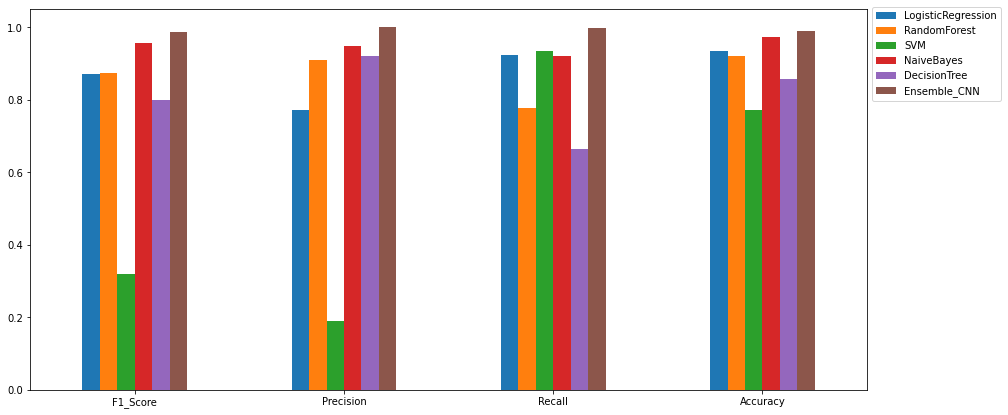

In [163]:
result = data.plot(kind='bar', rot=0, figsize=(15, 7));
result.legend(bbox_to_anchor=(1, 1.02), loc='upper left');